In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# A Simple Starter Code for the AJL Competition

@Cindy Deng

---


Hi! This starter code is designed to help you get familiar with basic Kaggle operations and guide you through the basic workflow of a machine learning project. 

The code outlines essential steps including data loading, preprocessing, model building, training, and generating predictions. Each section serves as a foundation, but there are many ways to enhance each step to improve your final model's accuracy. Feel free to experiment with different data augmentation techniques, model architectures, and tuning methods to optimize your final results! Some amazing tutorials are available through your AI Studio course in Canvas / in the 'Resource' section of this Kaggle competition.

Good luck and have fun!

---

## Note - About file path

You could use the cell above to print the names of the file directories and get the following directories:

```
/kaggle/input/bttai-ajl-2025/sample_submission.csv
/kaggle/input/bttai-ajl-2025/train.csv
/kaggle/input/bttai-ajl-2025/test.csv
/kaggle/input/bttai-ajl-2025/test/test/e0374ae6c1362ff183cfba28ded5421b.jpg
/kaggle/input/bttai-ajl-2025/test/test/437159c605260bdd079af230566af291.jpg
...
...
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/11271bdf2598afdd4260db3125e1f6a5.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/732819951dcf2b53d15ea7b8bb123b71.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/6dcc7a8abb5e1c6e670101f4b6231246.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/e63c3b3f0ab8905e204fe467cc7411f9.jpg
...
...
```



## 1. Import Necessary Libraries

In [2]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Explanation:
# - pandas and numpy: for data manipulation
# - sklearn: for splitting data and encoding labels
# - tensorflow.keras: for building and training the neural network

## 2. Load Data

Make sure to verify the file paths if you're running on a different platform.

In [20]:
for dirname, _, filenames in os.walk('test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

test\test\000e8dd5ee75dd6668e978e7a4e6fe54.jpg
test\test\0097275da3cb707415d13d2c59cf8c8c.jpg
test\test\009c75339a21bb84a6425be6a95938d6.jpg
test\test\016abe4884715af85cd3f309f93b9641.jpg
test\test\018504389f4fa566232eb6e3ff838cb8.jpg
test\test\01ba602def4506d8bfd5900cccd2ab4d.jpg
test\test\024a737cf57eda5493e8cb30551b4e97.jpg
test\test\0325ba9f88358e11a6abc3a63e584bf6.jpg
test\test\032a4ac5c1a3a8a90f6e7aede2d1ab64.jpg
test\test\0353409eed089c8165db5a968cf2c43f.jpg
test\test\038e343e66d76cb93438f5460dbf4eeb.jpg
test\test\0393b043e435e566657cf7d61879026c.jpg
test\test\03c5124f5b1ccaf03bbc3fecc0249e6c.jpg
test\test\0413727ba8089031523f7028d24a64da.jpg
test\test\045a04ebe8c8153226ed22c27ba8fac3.jpg
test\test\04672ea146d9dbc081cf63c160c7dfa0.jpg
test\test\051e5c8ce730d6a81961ca551c9fdb2a.jpg
test\test\0538c14b1dbc98e893372d3e132dfdbe.jpg
test\test\0552f0ffd7f1125b7cdf8e44bdbfc0c6.jpg
test\test\05eae8b3cf51683f62e9dcedd403c9ac.jpg
test\test\05f2225244026969ba7435f5959acedf.jpg
test\test\063

In [25]:
# 2. Load Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Add .jpg extension to md5hash column to reference the file_name
train_df['md5hash'] = train_df['md5hash'].astype(str) + '.jpg'
test_df['md5hash'] = test_df['md5hash'].astype(str) + '.jpg'

# Combine label and md5hash to form the correct path
train_df['file_path'] = 'train\\train\\' + train_df['label'] + '\\' + train_df['md5hash']
test_df['file_path'] = 'test\\test\\' + test_df['md5hash']  # Assuming test data doesn't have a label

In [5]:
# Check the first few rows to understand the structure
print(train_df.head())

                                md5hash  fitzpatrick_scale  \
0  fd06d13de341cc75ad679916c5d7e6a6.jpg                  4   
1  a4bb4e5206c4e89a303f470576fc5253.jpg                  1   
2  c94ce27e389f96bda998e7c3fa5c4a2e.jpg                  5   
3  ebcf2b50dd943c700d4e2b586fcd4425.jpg                  3   
4  c77d6c895f05fea73a8f3704307036c0.jpg                  1   

   fitzpatrick_centaur                             label nine_partition_label  \
0                    4                 prurigo-nodularis     benign-epidermal   
1                    1  basal-cell-carcinoma-morpheiform  malignant-epidermal   
2                    5                            keloid         inflammatory   
3                    3              basal-cell-carcinoma  malignant-epidermal   
4                    1                 prurigo-nodularis     benign-epidermal   

  three_partition_label            qc  ddi_scale  \
0                benign           NaN         34   
1             malignant           Na

In [6]:
print(f"Total number of entries: {len(train_df)}")

Total number of entries: 2860


## 3. Data Preprocessing


This section demonstrates basic preprocessing techniques. To enhance data quality and model performance, consider incorporating more advanced preprocessing methods.

For further guidance, feel free to take a look at the [Image Preprocessing tutorial](https://colab.research.google.com/drive/1-ItNcRMbZBE6BCwPT-wD8m3YmHqwHxme?usp=sharing)  available in the 'Resources' section of this Kaggle competition.


In [7]:
# Filter Out Bad Data
# Checks to see if the images are valid JPEGs using the JFIF metadata flag

from PIL import Image
import os

def is_valid_image(file_path, corrupt_image_counter):
    try:
        img = Image.open(file_path)
        img.verify()  # This will check if the image is valid
        return True
    except (IOError, SyntaxError) as e:
        print(f"Corrupted image {file_path}: {e}")
        corrupt_image_counter[0] += 1
        return False

# Filter the dataframe to include only valid images
corrupt_image_counter = [0]
train_df = train_df[train_df['file_path'].apply(lambda x: is_valid_image(x, corrupt_image_counter))]
print(f"Number of Corrupt Images: {corrupt_image_counter[0]}")

Number of Corrupt Images: 0


In [8]:
# EDA on the image dimensions and channels

from PIL import Image

def get_image_details(file_path):
    try:
        with Image.open(file_path) as img:
            return img.size, len(img.getbands())  # Size and the number of channels
    except Exception as e:
        print(f"Error opening image {file_path}: {e}")
        return None

# Apply this function to the 'file_path' column and create a new column 'image_details'
train_df['image_details'] = train_df['file_path'].apply(get_image_details)

# Print the result to see what is returned
print(train_df[['file_path', 'image_details']].head())

                                           file_path    image_details
0  train\train\prurigo-nodularis\fd06d13de341cc75...  ((438, 341), 3)
1  train\train\basal-cell-carcinoma-morpheiform\a...  ((495, 236), 3)
2  train\train\keloid\c94ce27e389f96bda998e7c3fa5...  ((402, 359), 3)
3  train\train\basal-cell-carcinoma\ebcf2b50dd943...  ((488, 362), 3)
4  train\train\prurigo-nodularis\c77d6c895f05fea7...  ((979, 783), 3)


In [9]:
# 3. Data Preprocessing
# Encode the labels
label_encoder = LabelEncoder()
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])

# from keras.utils import to_categorical

# # Convert labels to one-hot encoding
# train_df['encoded_label'] = to_categorical(train_df['encoded_label'], num_classes=21)

# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directory paths
train_dir = ''

In [10]:
def create_generator(dataframe, directory, batch_size=32, target_size=(128, 128)):
    """
    Template function to create image generators.
    Students should complete this function to load images and labels properly.
    """

    dataframe['encoded_label'] = dataframe['encoded_label'].astype(str)

    # Fill in the correct flow_from_dataframe parameters
    generator = train_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=directory,
        x_col='file_path',  # Use combined path
        y_col='encoded_label',
        target_size=target_size, # Resizing the images to help reduce the runtime
        batch_size=batch_size,
        class_mode='categorical',
        validate_filenames=False  # Disable strict filename validation
    )
    return generator

In [11]:
# Create generators
train_generator = create_generator(train_data, train_dir)
val_generator = create_generator(val_data, train_dir)

Found 2288 non-validated image filenames belonging to 21 classes.
Found 572 non-validated image filenames belonging to 21 classes.


## 4. Build the model


In [12]:
# TODO: You should implement the model architecture here.
# Feel free to explore different model types that best serve your purpose.

# Tesing out the Xception model

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception

# Load the pre-trained Xception model with weights from ImageNet
base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers to avoid training them
base_model.trainable = False

# Build the model on top of the base Xception model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Add global average pooling to reduce dimensionality
    layers.Dense(1024, activation='relu'),  # Add a fully connected layer with 1024 neurons
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(21, activation='softmax')  # Output layer with 21 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 4, 4, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │        21,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,981,181 (87.67 MB)

 Trainable params: 2,119,701 (8.09 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

## 5. Train the Model


Epoch 1/10


c:\Developer\ucla_ajl_team_6\ajlenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 314ms/step - accuracy: 0.2049 - loss: 2.8982 - val_accuracy: 0.3357 - val_loss: 2.2175
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 301ms/step - accuracy: 0.4223 - loss: 1.9445 - val_accuracy: 0.3706 - val_loss: 2.0994
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 302ms/step - accuracy: 0.4687 - loss: 1.6873 - val_accuracy: 0.3776 - val_loss: 2.0426
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 302ms/step - accuracy: 0.5769 - loss: 1.3987 - val_accuracy: 0.4231 - val_loss: 1.9770
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 305ms/step - accuracy: 0.6272 - loss: 1.2130 - val_accuracy: 0.4108 - val_loss: 2.0628
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - accuracy: 0.6520 - loss: 1.0686 - val_accuracy: 0.4248 - val_loss: 2.0889
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - accuracy: 0.7222 - loss: 0.8766 - val_accuracy: 0.4108 - val_loss: 2.0535
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 316ms/step - accuracy: 0.7948 - loss: 0.6761 - val_accuracy: 0.405

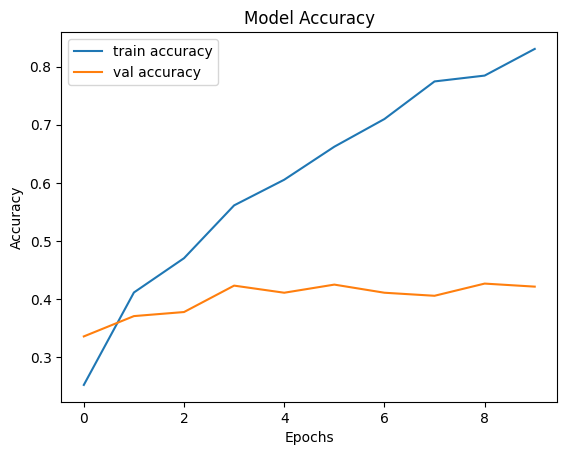

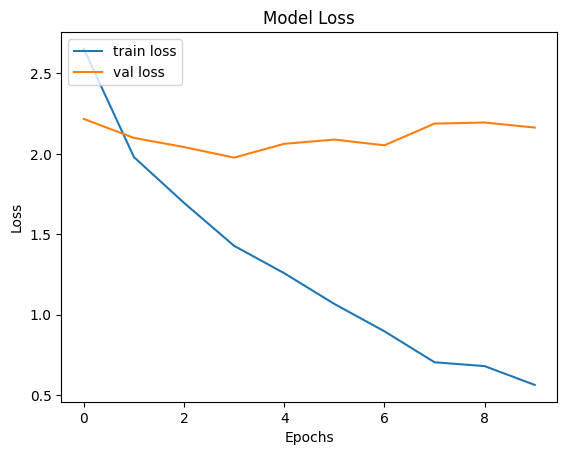

In [13]:
# TODO: Train your model here. 

history = model.fit(
    train_generator,  # The training dataset
    validation_data=val_generator,  # The validation dataset
    epochs=10,  # Number of epochs to train the model
    batch_size=32  # Number of samples per gradient update
)

# Plot training & validation accuracy and loss to track performance
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

## 6. Make Predictions on Test Data

In [26]:
# 6. Make Predictions on Test Data
def preprocess_test_data(test_df, directory, batch_size=32, target_size=(128, 128)):
    """
    Template for loading and preprocessing test images.
    """
    # TODO: create a generator for the test set here.
    # test_datagen = ImageDataGenerator(rescale=1./255)
    # test_generator = test_datagen.flow_from_dataframe(
    #     .... ## set the test_generator here 
    # )
    # return test_generator

    # Create ImageDataGenerator for test set (rescaling only)
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Generate test data from the dataframe
    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=directory,
        x_col='file_path',  # Column with the image paths
        y_col=None,  # No labels for the test data
        target_size=target_size,  # Resizing the images to match the model's expected input
        batch_size=batch_size,
        class_mode=None,  # No labels in test data (just for predictions)
        shuffle=False  # Don't shuffle the test data; we want predictions in order
    )
    return test_generator


In [27]:
print(test_df['file_path'].head())  

0    test\test\0844ae634f0e6e7ef1f73c2aeecbae0e.jpg
1    test\test\3b290d262098f761d719aa07cf36c040.jpg
2    test\test\cf561d08ac46d0fda678bff6621005ee.jpg
3    test\test\e6371069be05c6b0a95b4b3f1bacc9a5.jpg
4    test\test\f76cddb37265f97508f159078dcc7e7c.jpg
Name: file_path, dtype: object


In [28]:
# Load test data
test_dir = ''
test_generator = preprocess_test_data(test_df, test_dir)

Found 1227 validated image filenames.


## 7. Generate Predictions

In [29]:
# TODO
# Generate predictions based on the trained model
# Then, save the predictions into a CSV file for submission

# 1. Generate Predictions
predictions = model.predict(test_generator, verbose=1)

# 2. Get the predicted labels by finding the class with the highest probability
predicted_labels = np.argmax(predictions, axis=1)

# 3. Convert the predicted labels to their original class names
predicted_class_names = label_encoder.inverse_transform(predicted_labels)

# 4. Prepare a DataFrame to save the results
results_df = test_df.copy()  # Start with the test dataframe
results_df['predicted_label'] = predicted_class_names  # Add the predicted labels to the DataFrame

# 5. Save the predictions to a CSV file for submission
results_df[['file_path', 'predicted_label']].to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")

c:\Developer\ucla_ajl_team_6\ajlenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 359ms/step
Predictions saved to 'predictions.csv'
